# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: GSMF 

YOUR-ID: 2019102031| 2019102015

YOUR-NAME: Shaantanu kulkarni | Vijay Kalluri

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from sklearn.neighbors import KDTree

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png'  width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
from helpers.func import make_gaussian

In [3]:
def get_Jr_Gaussian(y_exp,x,a,m,s):
    da = y_exp/a
    dm = y_exp*(x-m)/(s**2)
    ds = ( y_exp*( ((x-m)**2)/(s**2) - 1 ) )/s
    Jr = np.array([da,dm,ds]).T
    return Jr

def get_residue(y_exp,y_o):
    return y_exp-y_o

10.571618003325147 0.5359932279214888 21.701061788658443


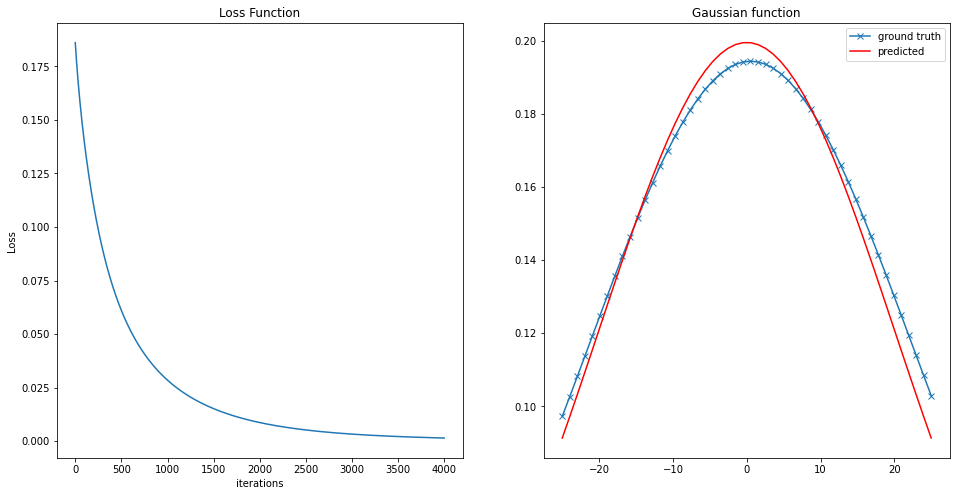

In [4]:
num_obs = 50
a_gt ,m_gt,s_gt = 10,0,20
x_o = np.linspace(-25,25,num_obs)
y_o = make_gaussian(x_o,a_gt,m_gt,s_gt)

epoch = 4000
lr = 1

a,m,s = 10,13,19.12
cost = []

for i in range(epoch):
    
    y_exp = make_gaussian(x_o,a,m,s)
    
    Jr = get_Jr_Gaussian(y_exp,x_o,a,m,s)
    r  = get_residue(y_exp,y_o)
    
    Jf = np.matmul(Jr.T,r)
    
    dk = -lr*Jf
    
    a,m,s = a+dk[0],m+dk[1],s+dk[2]
    
    cost.append(np.sum(r**2))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(cost)
plt.title('Loss Function')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(x_o,make_gaussian(x_o,a,m,s),marker="x")
plt.plot(x_o,y_o,color="r")
plt.title('Gaussian function')
plt.legend(["ground truth","predicted"])
print(a,m,s)

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [5]:
from helpers.func import make_non_linear

In [6]:
def get_Jr_NL(x,p1,p2,p3,p4):
    y_exp = make_non_linear(x,p1,p2,p3,p4)
    dp1 = np.exp(-x/p2)
    dp2 = p1*np.exp(-x/p2)*(x/p2**2)
    dp3 = np.sin(x/p4)
    dp4 = p3*np.cos(x/p4)*(-x/p4**2)
    Jr = np.array([dp1,dp2,dp3,dp4]).T
    return Jr

In [8]:
num_obs = 50
p1_gt,p2_gt,p3_gt,p4_gt = 2,8,4,8
x_o = np.linspace(-20,30,num_obs)
y_o = make_non_linear(x_o,p1_gt,p2_gt,p3_gt,p4_gt)

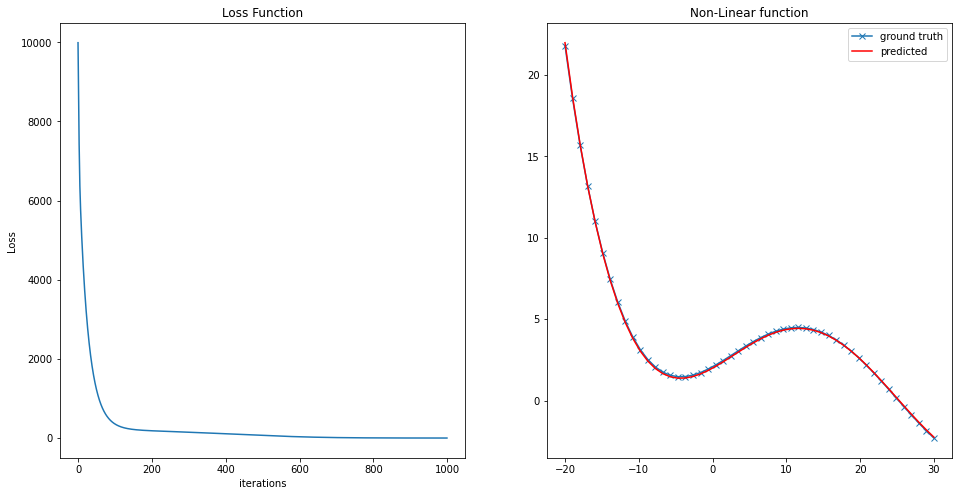

In [9]:
epoch = 1000
lr = 0.001

p1,p2,p3,p4 = 13,20,20,10
cost = []
for i in range(epoch):
    y_exp = make_non_linear(x_o,p1,p2,p3,p4)
    Jr = get_Jr_NL(x_o,p1,p2,p3,p4)
    r  = get_residue(y_exp,y_o)
    Jf = np.matmul(Jr.T,r)
    dk = -lr*Jf
    p1,p2,p3,p4 = p1+dk[0],p2+dk[1],p3+dk[2],p4+dk[3]
    cost.append(np.sum(r**2))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(cost)
plt.title('Loss Function')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(x_o,make_non_linear(x_o,p1,p2,p3,p4),marker="x")
plt.plot(x_o,y_o,color="r")
plt.title('Non-Linear function')
plt.legend(["ground truth","predicted"])

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

## Solutions

1. If the initial estimate is not near the ideal value, the algorithm converges to another local minima or sometimes the gradient explodes and the Loss function diverges.


2. Gradient descent takes too long to converge. Gauss newton and LM converges very quickly. The decrease in loss of gauss newton is similar to Gradient descent but quicker while the decrease in loss of LM is quite different . This is because, whenever the loss changes, we change the value of lambda. In Gauss Newton, we directly subtract the gradient instead of multiplying it with a constant factor . As a result of this , whenever the gradient is large , it takes a big step and when it is small, it takes a small step. This is the result why it converges quicker than Gradient Descent

In [49]:
### Gauss-Newton ###

num_obs = 50
a_gt ,m_gt,s_gt = 10,0,20
x_o = np.linspace(-25,25,num_obs)
y_o = make_gaussian(x_o,a_gt,m_gt,s_gt)

epoch = 10

a,m,s = 10,13,19.12
cost = []

for i in range(epoch):
    
    y_exp = make_gaussian(x_o,a,m,s)
    
    Jr = get_Jr_Gaussian(y_exp,x_o,a,m,s)
    r  = get_residue(y_exp,y_o)
    
    Jf = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Jr.T,Jr)),Jr.T),r)
    
    dk = -Jf
    
    print(dk)
    a,m,s = a+dk[0],m+dk[1],s+dk[2]
    
    cost.append(np.sum(r**2))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(cost)
plt.title('Loss Function')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(x_o,make_gaussian(x_o,a,m,s),marker="x")
plt.plot(x_o,y_o,color="r")
plt.title('Gaussian function')
plt.legend(["ground truth","predicted"])
print(a,m,s)

NameError: name 'make_gaussian' is not defined

9.999999999961478 4.441114975633059e-12 19.99999999988691


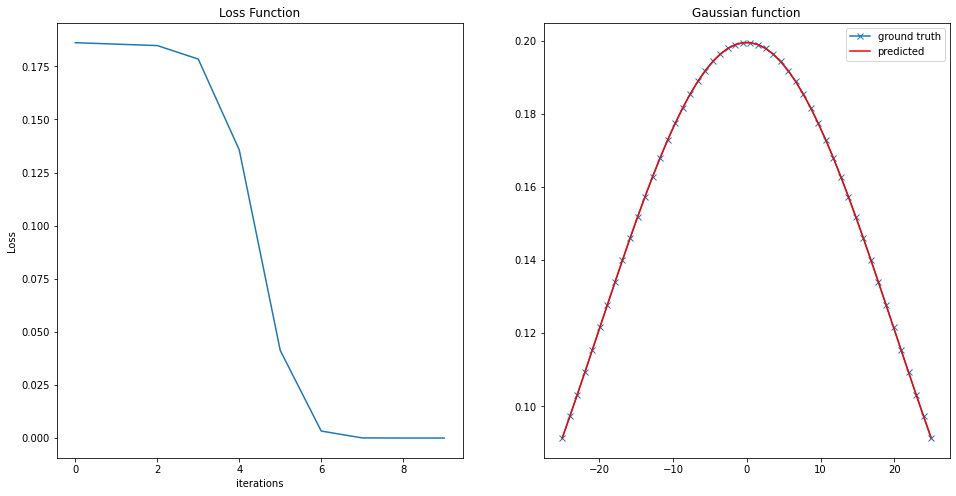

In [57]:
### Levenberg Marquardt ###

num_obs = 50
a_gt ,m_gt,s_gt = 10,0,20
x_o = np.linspace(-25,25,num_obs)
y_o = make_gaussian(x_o,a_gt,m_gt,s_gt)

epoch = 10

a,m,s = 10,13,19.12
cost = []

identity = np.eye(3,3)
Lambda = 1

for i in range(epoch):
    
    y_exp = make_gaussian(x_o,a,m,s)
    
    Jr = get_Jr_Gaussian(y_exp,x_o,a,m,s)
    r  = get_residue(y_exp,y_o)
    
    Jf = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Jr.T,Jr)+Lambda*identity),Jr.T),r)
    
    dk = -Jf
    
    a_prev,m_prev,s_prev = a,m,s
    
    a,m,s = a+dk[0],m+dk[1],s+dk[2]
    
    cost.append(np.sum(r**2))

    if i == 0:
        continue
    
    if cost[i] > cost[i-1]:
        a,m,s = a_prev,m_prev,s_prev
        Lambda = Lambda*10
    else:
        Lambda = Lambda*0.1
        
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(cost)
plt.title('Loss Function')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(x_o,make_gaussian(x_o,a,m,s),marker="x")
plt.plot(x_o,y_o,color="r")
plt.title('Gaussian function')
plt.legend(["ground truth","predicted"])
print(a,m,s)

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [2]:
def procrustes(x,y):
    n = x.shape[0]
    x0 = np.sum(x,axis=0)/n
    y0 = np.sum(y,axis=0)/n
    H = np.matmul((x-x0).T,y-y0)
    u,s,vh = np.linalg.svd(H)
    R = np.matmul(vh.T,u.T)
    t = y0 - np.matmul(R,x0)
    T = np.empty((4,4))
    T[:3,:3] = R
    T[:3,3] = t
    T[3,:] = np.array([0,0,0,1])
    
    return T

In [3]:
pi = math.pi
T = np.array([ [ 1 , 0 , 0 , 1 ] ,
               [ 0 , math.cos(pi/3) , -math.sin(pi/3) , 0 ] ,
               [ 0 , math.sin(pi/3) , math.cos(pi/3) , -2 ] ,
               [ 0 , 0 , 0 , 1 ]  ])

In [5]:
bunny_mesh = o3d.io.read_triangle_mesh("./bunny.ply")
bunny_mesh.compute_vertex_normals()

bunny_pcd1 = bunny_mesh.sample_points_poisson_disk(15000)

points = np.asarray(bunny_pcd1.points)
transformed_points = np.matmul(points,T[:3,:3].T) + T[:3,3]
bunny_pcd2 = o3d.geometry.PointCloud()
bunny_pcd2.points = o3d.utility.Vector3dVector(transformed_points)
p1 = np.asarray(bunny_pcd1.points)
p2 = np.asarray(bunny_pcd2.points)
T_computed = procrustes(p1,p2)
print(T_computed)
bunny_pcd1.transform(T_computed)
p1 = np.asarray(bunny_pcd1.points)
p2 = np.asarray(bunny_pcd2.points)
np.sum((p1-p2)**2)

[[ 1.00000000e+00 -1.55149233e-16  4.01631151e-17  1.00000000e+00]
 [ 1.49748948e-16  5.00000000e-01 -8.66025404e-01  4.85722573e-17]
 [ 9.07910863e-17  8.66025404e-01  5.00000000e-01 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


2.425404358470288e-25

### 4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.

Let $X,Y$ be two point sets with known correspondences. Further , let $i^{th}$ point in $X$ corresponds to $i^{th}$ point in $Y$.

We want to find $R,t$ such that $Rx_n + t$ is as close as possible to $y_n$ where $n = 1,2,...,N $ ,i.e.,

\begin{equation*}
\begin{aligned}
& \underset{{R,t}}{\text{argmin}}
& & \sum_{n=1}^{N}\|y_n-Rx_n-t\|_2^2p_n \\
& \text{subject to}
& & R^TR = I.
\end{aligned}
\end{equation*}
where $p_n$ is the weight given to each observation ( here it is same for all points).

The constraint uses the fact that the rotation matrix $R$ is orthonormal.

Let $y_0 = \frac{\sum y_np_n}{\sum p_n}$ 

$\sum \|y_n-Rx_n-t\|_2^2p_n = \sum \|y_n-y_0+y_0-Rx_n-t\|_2^2p_n = \sum \|y_n-y_0-(Rx_n+t-y_0)\|_2^2p_n$

Letting $x_0 = R^Ty_0 - R^Tt$

\begin{gather}
\begin{split}
\sum \|y_n-Rx_n-t\|_2^2p_n &= \sum \|y_n-y_0-R(x_n+R^Tt-R^Ty_0)\|_2^2p_n \notag\\
&= \sum \|y_n-y_0-R(x_n-x_0)\|_2^2p_n \notag\\
&= \sum (y_n-y_0-R(x_n-x_0))^T(y_n-y_0-R(x_n-x_0))p_n \notag\\
f(x_0,R) &= \sum (y_n-y_0)^T(y_n-y_0)p_n - 2\sum (y_n-y_0)^TR(x_n-x_0)p_n + \sum (x_n-x_0)^T(x_n-x_0)p_n \notag\\
 \end{split}
\end{gather}

The original problem then becomes :
\begin{equation*}
\begin{aligned}
& \underset{{R,x_0}}{\text{argmin}}
& & f(x_0,R) \\
& \text{subject to}
& & R^TR = I.
\end{aligned}
\end{equation*}

Taking partial derivative of $f$ with respect to $x_0$ and equating to $0$ gives :
\begin{equation*}
2\sum R^T(y_n-y_0)p_n - 2\sum (x_n-x_0)p_n = 0\\
\sum (x_n-x_0)p_n = \sum R^T(y_n-y_0)p_n\\
x_0\sum p_n = \sum x_np_n - R^T\sum (y_n-y_0)p_n\\
\end{equation*}
Note that , $\sum (y_n-y_0)p_n = \sum y_np_n - y_0\sum p_n = 0$:
\begin{equation*}
x_0 = \frac{\sum x_np_n}{\sum p_n}\\
\end{equation*}
This is the value of $x_0$ that minimizes $f$.

Let $a_n = x_n - x_0$ and $b_n=y_n-y_0$, $f$ becomes:
\begin{equation*}
f(x_0,R) = \sum b_n^Tb_np_n - 2\sum b_n^TRa_np_n + \sum a_n^Ta_np_n 
\end{equation*}

Minimizing $f$ with respect to R will be same as maximizing $\sum b_n^TRa_np_n$ with respect to R ,i.e., 

$$\underset{{R}}{\text{argmin}}f(x_0,R) = \underset{{R}}{\text{argmax}}\sum b_n^TRa_np_n$$

\begin{gather}
\begin{split}
\sum b_n^TRa_np_n &= Tr\left(\sum Ra_nb_n^Tp_n\right) \notag\\
&= Tr\left(R\sum a_nb_n^Tp_n\right) = Tr(RH)\notag\\
\end{split}
\end{gather}

where $H = \sum a_nb_n^Tp_n$ is a 3x3 matrix

#### Lemma:
For any positive semi-definite matrix $AA^T$ and any orthonormal matrix $B$ ,
    $$ Tr(AA^T) \geq Tr(BAA^T)$$
#### Proof:
$Tr(BAA^T) = Tr(A^TBA) = \sum_{i}a_i^TBa_i$

where $a_i$ is $i^{th}$ coloumn of $A$

using Cauchy-Schwartz inequality:
\begin{gather}
\begin{split}
a_i^TBa_i &\leq \|a_i\|\|Ba_i\| \notag\\
&\leq \sqrt{a_i^Ta_i}\sqrt{(Ba_i)^TBa_i} \notag\\
&\leq \sqrt{a_i^Ta_i}\sqrt{a_i^TB^TBa_i} \notag\\
\text{$B$ is orthonormal ,i.e., $BB^T = I$}\\
&\leq a_i^Ta_i
\end{split}
\end{gather}

Therfore , $\sum_{i}a_i^TBa_i \leq \sum_{i}a_i^Ta_i$
$\implies$ $Tr(AA^T) \geq Tr(BAA^T)$

Consider the SVD of $H$:
$$ H = U \Sigma V^T$$
$U,V$ will be orthonormal matrices , $\Sigma$ is a diagonal matrix 
Assuming $H$ is full rank ( if this is not true then there wont be a unique solution )

Let $X = VU^T$ , X will be a 3x3 orthonormal matrix

$ XH = VU^TU\Sigma V^T = V\Sigma V^T$

Since $\Sigma$ is a diagonal matrix with non-negative values $\sigma_1,\sigma_2,..$ on the diagonal, we can write ,
$$XH = V  \Sigma^{\frac{1}{2}} {\Sigma^T}^{\frac{1}{2}} V^T$$
where $\Sigma^{\frac{1}{2}}$ is a diagonal matrix with diagonal entries as $\sqrt{\sigma_1},\sqrt{\sigma_2},..$
$$XH = V  \Sigma^{\frac{1}{2}} ({V{\Sigma}^{\frac{1}{2}}})^T$$
From Lemma ,
$$Tr(XH) \geq Tr(BXH)$$
for any orthonormal matrix $B$

$Tr(BXH)$ is maximum when $B=I$
Among all 3x3 orthonormal matrices $X$ maximizes the value $Tr(XH)$

Therefore , $Tr(RH)$ will be maximum when $R = X$

\begin{equation*}
R = VU^T\\
x_0 = \frac{\sum x_np_n}{\sum p_n} \\
\end{equation*}

Since $x_0 = R^Ty_0 - R^Tt$ we get , 
\begin{equation*}
t = y_0 - Rx_0
\end{equation*}

We obtained this solution by minimizing the mean square error between two point sets , thus , Procrustes alignment gives the best aligning transform between point clouds with known correspondences

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [6]:
def custom_visualize(geometry_list,front=None,lookat=None,up=None):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    for i in geometry_list:
        vis.add_geometry(i)
    if(front):
        o3d.visualization.ViewControl.set_front(vis.get_view_control(), front)
    if(lookat):
        o3d.visualization.ViewControl.set_lookat(vis.get_view_control(), lookat)
    if(up):
        o3d.visualization.ViewControl.set_up(vis.get_view_control(), up)
    vis.run()
    vis.destroy_window()

In [40]:
def get_rotation_matrix(a,b,c):
    rotation_matrix = np.array([[np.cos(a)*np.cos(b),np.cos(a)*np.sin(b)*np.sin(c) - np.sin(a)*np.cos(c) , np.cos(a)*np.sin(b)*np.cos(c) + np.sin(a)*np.sin(c)],
                                [np.sin(a)*np.cos(b),np.sin(a)*np.sin(b)*np.sin(c) + np.cos(a)*np.cos(c) , np.sin(a)*np.sin(b)*np.cos(c) - np.cos(a)*np.sin(c)],
                                [-np.sin(b),np.cos(b)*np.sin(c), np.cos(b)*np.cos(c)]])
    return rotation_matrix


In [57]:
pi = math.pi
R= get_rotation_matrix(pi/18,pi/10,pi/18)
T = np.zeros([4,4])
T[:3,:3] = R
T[3,:] = np.array([0,0,0,1])
T[:3,3] = np.array([0.2,0,0]).T
# np.matmul(R,R.T)
print(T)

[[ 0.93660783 -0.11816505  0.32985268  0.2       ]
 [ 0.16514923  0.97916431 -0.11816505  0.        ]
 [-0.30901699  0.16514923  0.93660783  0.        ]
 [ 0.          0.          0.          1.        ]]


In [58]:
bunny_mesh = o3d.io.read_triangle_mesh("./bunny.ply")
bunny_mesh.compute_vertex_normals()

num_points = 15000
bunny_pcd1 = bunny_mesh.sample_points_poisson_disk(num_points)
sample = 15
bunny_pcd1.uniform_down_sample(sample)
p1 = np.asarray(bunny_pcd1.points)
num_points = p1.shape[0]

color = np.zeros((num_points,3))
color[:] = [0,1,0]
bunny_pcd1.colors = o3d.utility.Vector3dVector(color)

p2 = np.matmul(p1,T[:3,:3].T) + T[:3,3]

bunny_pcd2 = o3d.geometry.PointCloud()
bunny_pcd2.points = o3d.utility.Vector3dVector(p2)
color = np.zeros((num_points,3))
color[:] = [1,0,0]
bunny_pcd2.colors = o3d.utility.Vector3dVector(color)

In [59]:
def get_nearest_points(p1,p2,tree):
    p2_new = np.empty(p1.shape)
    for i,point in enumerate(p1):
        dist , ind = tree.query(p1[i,None],k=1)
        p2_new[i] = p2[ind]
    return p2_new

0th epoch completed
Loss :99.80603340356672
1th epoch completed
Loss :72.17766154504885
2th epoch completed
Loss :59.5669030254757
3th epoch completed
Loss :51.56266978666066
4th epoch completed
Loss :45.212652898544896
5th epoch completed
Loss :39.29941851390595
6th epoch completed
Loss :33.57521496752284
7th epoch completed
Loss :28.39928796689786
8th epoch completed
Loss :23.943234800186257
9th epoch completed
Loss :20.11361995898551
10th epoch completed
Loss :16.78295388330233
11th epoch completed
Loss :13.968505398404757
12th epoch completed
Loss :11.654772230974213
13th epoch completed
Loss :9.728017045912177
14th epoch completed
Loss :8.050378563990247
15th epoch completed
Loss :6.599819484345021
16th epoch completed
Loss :5.374995036730503
17th epoch completed
Loss :4.316586194556905
18th epoch completed
Loss :3.4161804136036746
19th epoch completed
Loss :2.663116560467462
20th epoch completed
Loss :2.050722156649127
21th epoch completed
Loss :1.5541928360219484
22th epoch comp

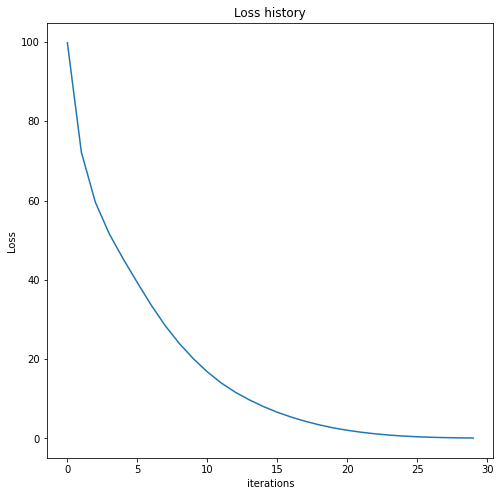

In [60]:
epoch = 30
loss_history = []
def icp_align(p1,p2):
    tree = KDTree(p2, leaf_size=2)
    T_final = np.eye(4)
    for i in range(epoch):
        p2_ = get_nearest_points(p1,p2,tree)
        T = procrustes(p1,p2_)
        p1 = np.matmul(p1,T[:3,:3].T) + T[:3,3]
        T_final = np.matmul(T,T_final)
        loss_history.append(np.sum((p1-p2)**2))

        print(f"{i}th epoch completed")
        print(f"Loss :{np.sum((p1-p2)**2)}")
    
    return T_final

### point clouds before alignment ###
cf1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1,origin=bunny_pcd1.get_center())
cf2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1,origin=bunny_pcd2.get_center())
custom_visualize([cf1,bunny_pcd1,cf2,bunny_pcd2])

T_comp = icp_align(p1,p2)
bunny_pcd1.transform(T_comp)
plt.figure(figsize=(8,8))
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('iterations')
plt.ylabel('Loss')

### point clouds after alignment ###
bunny_pcd1.points = o3d.utility.Vector3dVector(p1)
bunny_pcd2.points = o3d.utility.Vector3dVector(p2)
cf1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.01,origin=bunny_pcd1.get_center())
cf2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.01,origin=bunny_pcd2.get_center())
custom_visualize([cf1,bunny_pcd1,cf2,bunny_pcd2])

### Before ICP
<img src="./helpers/2.png">

### After ICP
<img src="./helpers/3.png">

In [62]:
print(f"Transformation Matrix Error: {np.sum((T_comp - T)**2)}" )

Transformation Matrix Error: 0.0041624932921011226


#### 3.

No , This happens due to noise and unknown correspondence.
However if the initial correspondence was close enough then it will converge quickly and give a correct answer.

#### 4.

We compute the point to point distance like regular ICP but then project this onto the normal and take correspondences using using this.

This results in faster convergence.
<img src='./helpers/1.png' >
The dotted lines are closest point , the hard line is the normal giving the correspondence.